<a href="https://colab.research.google.com/github/dtabuena/Images/blob/main/PlayWithImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import skimage
import numpy as np
from  matplotlib import pyplot as plt

In [ ]:
!wget 'https://www.dropbox.com/s/ipc4m5lrs0l7iml/2022x08x17_RNF182_E4KI_F_P256_s002_c006_CA3xPOS_MMStack_Default.ome.tif'
filename = '/content/2022x08x17_RNF182_E4KI_F_P256_s002_c006_CA3xPOS_MMStack_Default.ome.tif'


import skimage.io as skio
imstack1 = skio.imread(filename, plugin="tifffile")




[[5.99916131e-04]
 [7.57274379e-05]]


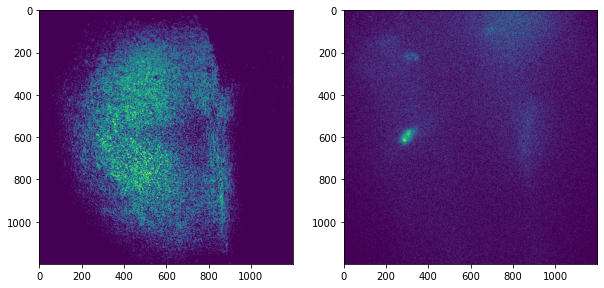

In [35]:
import skimage.filters as skfilt
from skimage import filters


imstack1.shape
num_z = imstack1.shape[0]
z_dims =  range(num_z)
thresh_val = np.ones([num_z,1])*np.nan
fig, axs = plt.subplots(1,num_z, figsize=np.array([num_z,1])*5)
for zi in z_dims:
    edge_im =  filters.sobel( imstack1[zi,:,:] ) 
    # axs[zi].imshow(  ) 
    thresh_val[zi] = skfilt.threshold_otsu(edge_im)
    mask = edge_im>thresh_val[zi]*1
    axs[zi].imshow(imstack1[zi,:,:]*mask)
print(thresh_val)

##




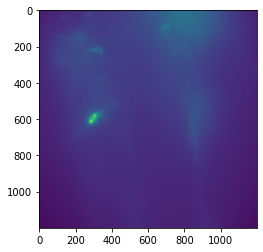

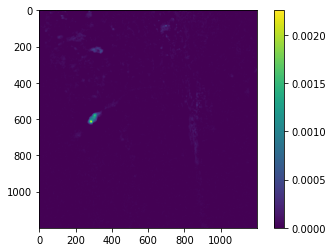

In [83]:
Red_image =  imstack1[1,:,:]  
plt.imshow(Red_image)
plt.show()
Red_image = skimage.filters.difference_of_gaussians(Red_image,low_sigma=2 ,high_sigma=20)
Red_image[Red_image<0] = 0
c = plt.imshow(Red_image)
plt.colorbar(c)
plt.show()

DIC_image (1200, 1200)
Merge (1200, 1200, 3)


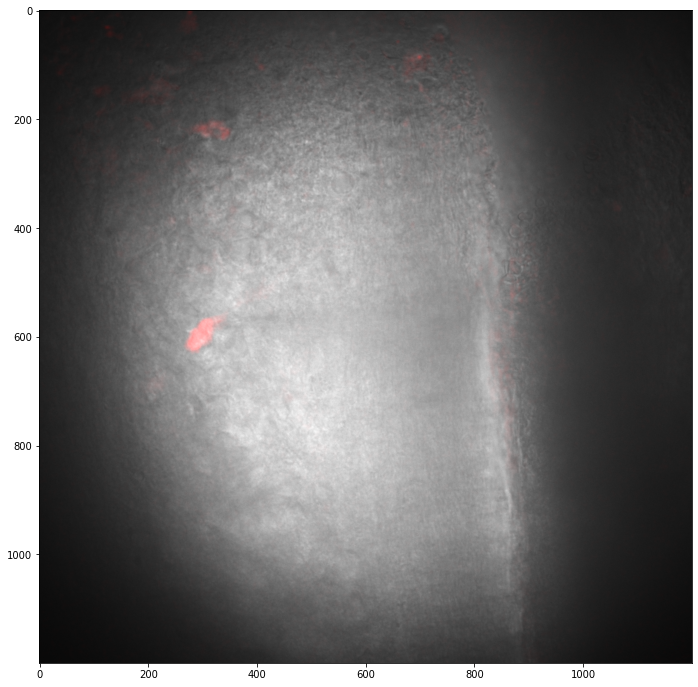

In [84]:
DIC_image =  imstack1[0,:,:] 
Red_image =  imstack1[1,:,:]  
print('DIC_image',DIC_image.shape)
Merge = np.repeat( np.expand_dims(DIC_image,2),3,2)
Merge = Merge/np.max(Merge)
print('Merge',Merge.shape)

Red_image = skimage.filters.difference_of_gaussians(Red_image,low_sigma=2 ,high_sigma=20)
Red_image[Red_image<0] = 0

Merge[:,:,0] = Merge[:,:,0]+Red_image/(np.max(Red_image))
plt.imshow(Merge)
fig = plt.gcf()
fig.set_figheight(12)
fig.set_figwidth(12)